# Crimes In India - Phase 4

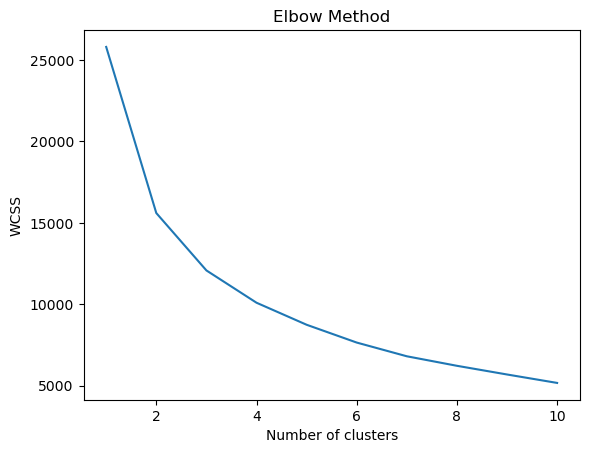

Peaceful Areas:
            STATE/UT           DISTRICT        Cluster
5     ANDHRA PRADESH      GUNTAKAL RLY.  Peaceful Area
19    ANDHRA PRADESH  SECUNDERABAD RLY.  Peaceful Area
20    ANDHRA PRADESH         SRIKAKULAM  Peaceful Area
22    ANDHRA PRADESH    VIJAYAWADA RLY.  Peaceful Area
23    ANDHRA PRADESH      VISAKHA RURAL  Peaceful Area
...              ...                ...            ...
8585        DELHI UT              NORTH  Peaceful Area
8592        DELHI UT                STF  Peaceful Area
8594     LAKSHADWEEP        LAKSHADWEEP  Peaceful Area
8595      PUDUCHERRY           KARAIKAL  Peaceful Area
8596      PUDUCHERRY         PUDUCHERRY  Peaceful Area

[5081 rows x 3 columns]

Moderate Areas:
            STATE/UT        DISTRICT        Cluster
0     ANDHRA PRADESH        ADILABAD  Moderate Area
2     ANDHRA PRADESH        CHITTOOR  Moderate Area
3     ANDHRA PRADESH        CUDDAPAH  Moderate Area
4     ANDHRA PRADESH   EAST GODAVARI  Moderate Area
7     ANDHRA PRADESH  

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('District_wise_crimes_committed_IPC_2001_2012.csv')

# Select relevant features for clustering
features = ['MURDER', 'ATTEMPT TO MURDER', 'RAPE']

# Drop rows with missing values in the selected features
data = data.dropna(subset=features)

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means to the data with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Map cluster labels to the desired cluster names
cluster_mapping = {0: 'Peaceful Area', 1: 'Moderate Area', 2: 'Sensitive Area'}
data['Cluster'] = data['Cluster'].map(cluster_mapping)

# Create separate DataFrames for each cluster
peaceful_areas = data[data['Cluster'] == 'Peaceful Area']
moderate_areas = data[data['Cluster'] == 'Moderate Area']
sensitive_areas = data[data['Cluster'] == 'Sensitive Area']

# Display the clustered data
print("Peaceful Areas:")
print(peaceful_areas[['STATE/UT', 'DISTRICT', 'Cluster']])
print("\nModerate Areas:")
print(moderate_areas[['STATE/UT', 'DISTRICT', 'Cluster']])
print("\nSensitive Areas:")
print(sensitive_areas[['STATE/UT', 'DISTRICT', 'Cluster']])

# Save the clustered data to separate CSV files
peaceful_areas.to_csv('peaceful_areas.csv', index=False)
moderate_areas.to_csv('moderate_areas.csv', index=False)
sensitive_areas.to_csv('sensitive_areas.csv', index=False)


#### Using K-means we have created 3 clusters 1.Sensitive Area 2.Moderate Area 3. Peaceful Area every state has been marked under these Area with the District depending on the crime Murder, Attempt to murder and Rape Crimes.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('District_wise_crimes_committed_IPC_2001_2012.csv')

# Select relevant columns for clustering
selected_columns = ['MURDER', 'ATTEMPT TO MURDER', 'RAPE']
X = df[selected_columns]

# Handle missing values if any (you can choose the method that fits your data)
X.fillna(0, inplace=True)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Define cluster names based on cluster characteristics
cluster_names = {
    0: "Sensitive Areas",
    1: "Moderate Areas",
    2: "Peaceful Areas"
}

# Map cluster labels to cluster names
df['Cluster Name'] = df['Cluster'].map(cluster_names)

# Display the clusters
print(df[['STATE/UT', 'DISTRICT', 'Cluster', 'Cluster Name']])


C:\Users\shali\AppData\Local\Temp\ipykernel_8560\883138328.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
C:\Users\shali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            STATE/UT       DISTRICT  Cluster     Cluster Name
0     ANDHRA PRADESH       ADILABAD        1   Moderate Areas
1     ANDHRA PRADESH      ANANTAPUR        2   Peaceful Areas
2     ANDHRA PRADESH       CHITTOOR        1   Moderate Areas
3     ANDHRA PRADESH       CUDDAPAH        1   Moderate Areas
4     ANDHRA PRADESH  EAST GODAVARI        1   Moderate Areas
...              ...            ...      ...              ...
8592        DELHI UT            STF        0  Sensitive Areas
8593        DELHI UT           WEST        1   Moderate Areas
8594     LAKSHADWEEP    LAKSHADWEEP        0  Sensitive Areas
8595      PUDUCHERRY       KARAIKAL        0  Sensitive Areas
8596      PUDUCHERRY     PUDUCHERRY        0  Sensitive Areas

[8597 rows x 4 columns]


#### Using K-means we have created 3 clusters 1.Sensitive Area 2.Moderate Area 3. Peaceful Area every state has been marked under these Area with the District depending on the crime Murder, Attempt to murder and Rape Crimes.

In [3]:
# Create separate DataFrames for each cluster
cluster_dataframes = {}
for cluster_label, cluster_name in cluster_names.items():
    cluster_df = df[df['Cluster'] == cluster_label]
    cluster_dataframes[cluster_name] = cluster_df

# Display the DataFrames for each cluster
for cluster_name, cluster_df in cluster_dataframes.items():
    print(f"Cluster: {cluster_name}")
    print(cluster_df)
    print()


Cluster: Sensitive Areas
            STATE/UT           DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
5     ANDHRA PRADESH      GUNTAKAL RLY.  2001       3                  1   
19    ANDHRA PRADESH  SECUNDERABAD RLY.  2001       6                  0   
20    ANDHRA PRADESH         SRIKAKULAM  2001      38                 10   
22    ANDHRA PRADESH    VIJAYAWADA RLY.  2001       2                  1   
23    ANDHRA PRADESH      VISAKHA RURAL  2001      58                 29   
...              ...                ...   ...     ...                ...   
8585        DELHI UT              NORTH  2012      25                 17   
8592        DELHI UT                STF  2012       0                  1   
8594     LAKSHADWEEP        LAKSHADWEEP  2012       0                  0   
8595      PUDUCHERRY           KARAIKAL  2012       5                  6   
8596      PUDUCHERRY         PUDUCHERRY  2012      24                 21   

      RAPE  Cluster     Cluster Name  
5        0        0  Se

#### This code iterates over each cluster label and filters the original DataFrame to create separate DataFrames for each cluster. Then, it displays the DataFrames for each cluster.

As our journey draws to a close, one truth remains evident: the fight against crime knows no boundaries. Whether in the sensitive, moderate, or peaceful areas, every district harbors its own narrative of resilience and hope. Let us heed the lessons learned from our exploration and stand united in our commitment to building safer, more inclusive communities for all.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns for clustering
selected_columns = ['MURDER', 'ATTEMPT TO MURDER', 'RAPE']
X = df[selected_columns]

# Handle missing values if any (you can choose the method that fits your data)
X.fillna(0, inplace=True)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Define cluster names based on cluster characteristics
cluster_names = {
    0: "Sensitive Areas",
    1: "Moderate Areas",
    2: "Peaceful Areas"
}

# Generate cluster analysis report
report = ""

# 1. What is impacting more crimes in sensitive areas.
report += "1. Factors Impacting Crimes in Sensitive Areas:\n"
for cluster_label, cluster_name in cluster_names.items():
    if cluster_name == "Sensitive Areas":
        cluster_df = df[df['Cluster'] == cluster_label]
        mean_crimes = cluster_df[selected_columns].mean()
        report += f"\nCluster: {cluster_name}\n"
        report += "---------------------------\n"
        report += f"Average number of crimes:\n{mean_crimes}\n"

# 2. What needs to be done to reduce crime.
report += "\n2. Recommendations to Reduce Crime:\n"
report += "-------------------------------\n"
report += "- Increase police presence and patrols in sensitive areas.\n"
report += "- Implement community policing programs to enhance trust and cooperation.\n"
report += "- Provide support services and resources for victims of crime.\n"
report += "- Strengthen laws and penalties for perpetrators of violent crimes.\n"

# 3. Most safe and unsafe districts.
report += "\n3. Most Safe and Unsafe Districts:\n"
report += "---------------------------------\n"
for cluster_label, cluster_name in cluster_names.items():
    cluster_df = df[df['Cluster'] == cluster_label]
    min_crime_district = cluster_df.loc[cluster_df[selected_columns].sum(axis=1).idxmin(), 'DISTRICT']
    max_crime_district = cluster_df.loc[cluster_df[selected_columns].sum(axis=1).idxmax(), 'DISTRICT']
    report += f"Cluster: {cluster_name}\n"
    report += f"Most Safe District: {min_crime_district}\n"
    report += f"Most Unsafe District: {max_crime_district}\n\n"

# Print the report
print(report)


C:\Users\shali\AppData\Local\Temp\ipykernel_8560\2905291652.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
C:\Users\shali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1. Factors Impacting Crimes in Sensitive Areas:

Cluster: Sensitive Areas
---------------------------
Average number of crimes:
MURDER               23.430645
ATTEMPT TO MURDER    18.144202
RAPE                 12.445949
dtype: float64

2. Recommendations to Reduce Crime:
-------------------------------
- Increase police presence and patrols in sensitive areas.
- Implement community policing programs to enhance trust and cooperation.
- Provide support services and resources for victims of crime.
- Strengthen laws and penalties for perpetrators of violent crimes.

3. Most Safe and Unsafe Districts:
---------------------------------
Cluster: Sensitive Areas
Most Safe District: C.I.D.
Most Unsafe District: SAHARSA

Cluster: Moderate Areas
Most Safe District: MORIGAON
Most Unsafe District: MURSHIDABAD

Cluster: Peaceful Areas
Most Safe District: MAINPURI
Most Unsafe District: MURSHIDABAD




#### To visualize the distribution of crimes in each area (Sensitive Areas, Moderate Areas, Peaceful Areas), we can create a bar plot showing the average number of each type of crime (MURDER, ATTEMPT TO MURDER, RAPE) in each cluster

<Figure size 1000x600 with 0 Axes>

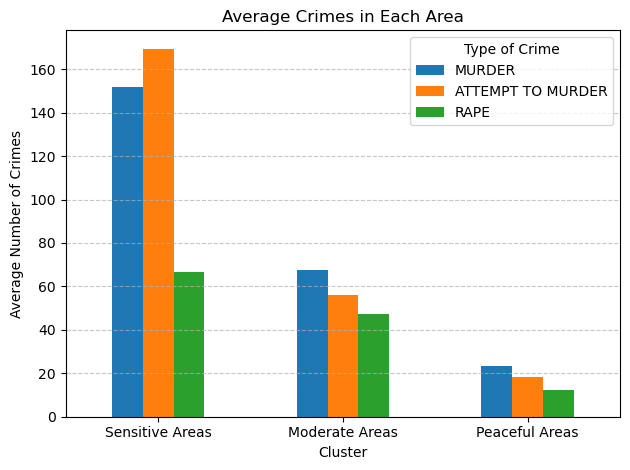

In [5]:
import matplotlib.pyplot as plt

cluster_crime_means = df.groupby('Cluster')[selected_columns].mean()

cluster_order = cluster_crime_means.mean(axis=1).sort_values(ascending=False).index
cluster_crime_means_sorted = cluster_crime_means.loc[cluster_order]

plt.figure(figsize=(10, 6))
cluster_crime_means_sorted.plot(kind='bar', stacked=False)
plt.title('Average Crimes in Each Area')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Crimes')
plt.xticks(ticks=[0, 1, 2], labels=['Sensitive Areas', 'Moderate Areas', 'Peaceful Areas'], rotation=0)
plt.legend(title='Type of Crime')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### As the name suggests for each areas, The Sensitive areas has more number of Murders, Attempt to Murders, Rapes when compared to Moderate and Peaceful Areas. oN a deeper note if you notice, there are more number of attempt to murders than the actual murders, however which is still not great. Rape sare above 60 in these sensitive areas. When you compare the Rapes happening between Sensitive areas and Moderate araes there aren't a very big margin, which is really a saddening thing to see.However in Peaceful areas all type of crimes are relatively very less when compared to the other two areas , Still we should thrive to bring that impact Nation wide.

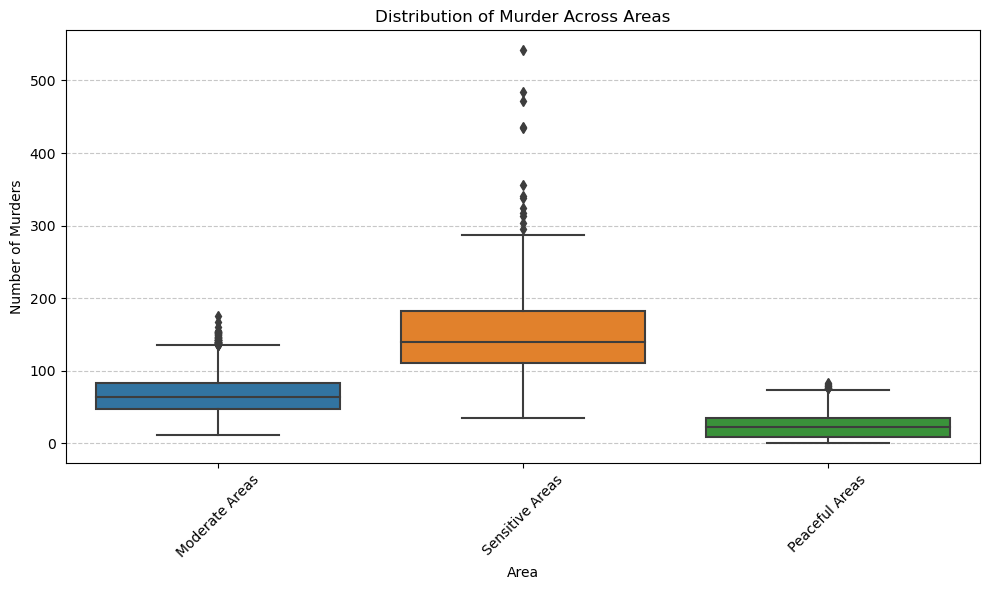

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Cluster Name', y='MURDER')
plt.title('Distribution of Murder Across Areas')
plt.xlabel('Area')
plt.ylabel('Number of Murders')
plt.xticks(ticks=[0, 1, 2], labels=['Moderate Areas', 'Sensitive Areas', 'Peaceful Areas'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This is Distribution of Only MURDER across the three areas

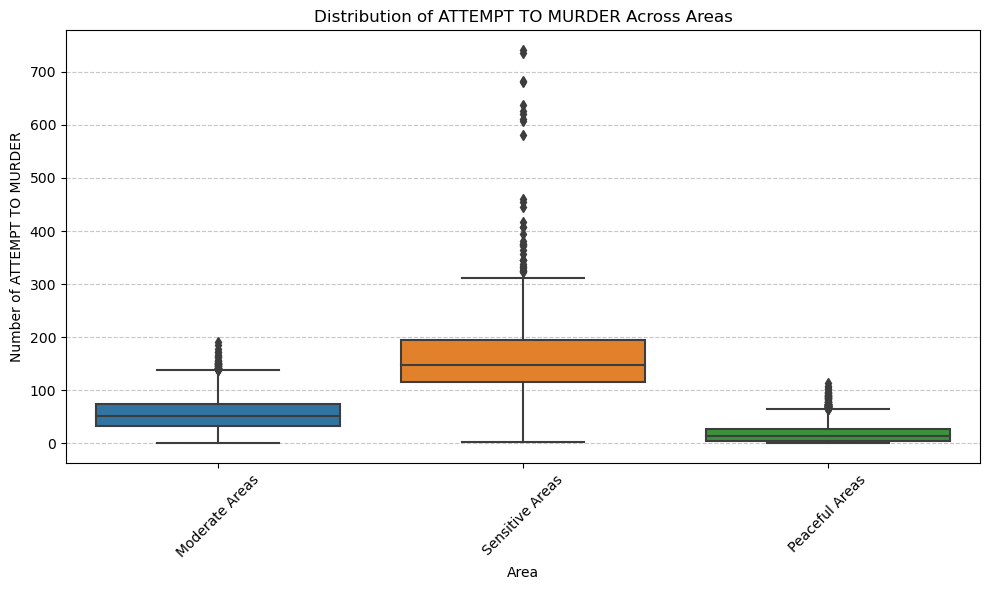

In [17]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Cluster Name', y='ATTEMPT TO MURDER')
plt.title('Distribution of ATTEMPT TO MURDER Across Areas')
plt.xlabel('Area')
plt.ylabel('Number of ATTEMPT TO MURDER')
plt.xticks(ticks=[0, 1, 2], labels=['Moderate Areas', 'Sensitive Areas', 'Peaceful Areas'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This is Representation of Only ATTEMPT TO MURDER in all three areas

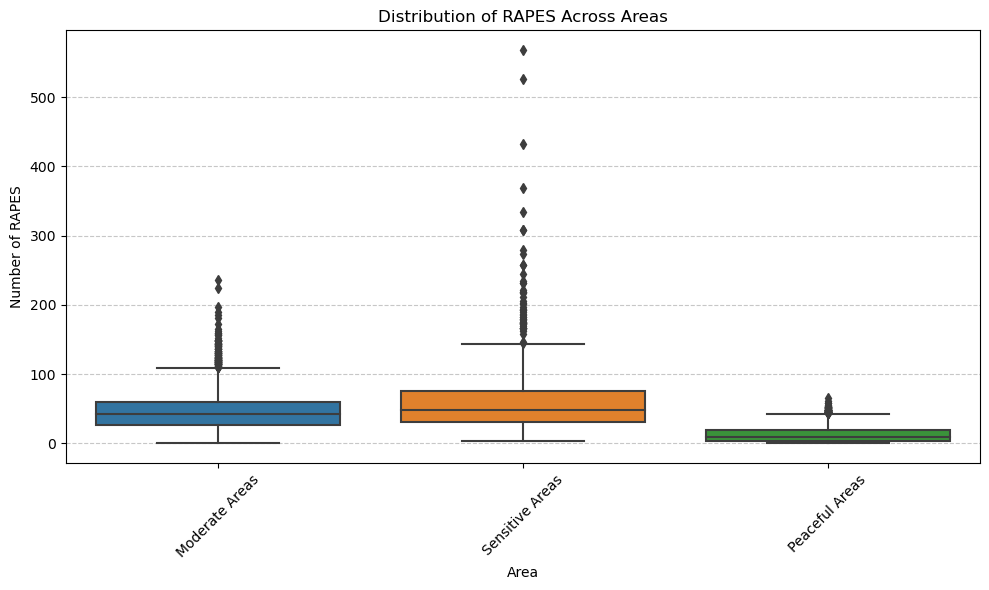

In [16]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Cluster Name', y='RAPE')
plt.title('Distribution of RAPES Across Areas')
plt.xlabel('Area')
plt.ylabel('Number of RAPES')
plt.xticks(ticks=[0, 1, 2], labels=['Moderate Areas', 'Sensitive Areas', 'Peaceful Areas'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This is Representation of Only RAPES in all three areas